# Fandango's Inflated Ratings
In October of 2015, a data journalist named Walt Hickey analyzed Fandango's rating system.  He was able to ascertain that the rating system was heavily biased and even dishonest.  

He was able to scrape the HTML and find that the users input rating was different from the displayed rating.  The following are some examples of how the ratings were skewed.  

- The actual rating was typically rounded up to the nearest half-star.  For example, a 4.1 rating would be rounded up to 4.5.
- In 8% of the ratings he analyzed, rounding was done up to the nearest whole star.  For example, 4.5 would be rounded to 5.
- Some examples were completely off, for example a rating of 4 was displayed as 5.

![graph](https://s3.amazonaws.com/dq-content/288/s1gp_actual_vs_displayed.png)

We can also see that not only are all ratings strongly left skewed, the Fandango rating is shifted to the right compared to the actual rating.  This mean there is some inflation of the ratings occuring.  It also seems that there are zero ratings below 2 stars which doesn't seem feasible.

Fandango released a statement saying this was a glitch in their code and the issue has been fixed.  The actual rating has been removed from the HTML so it's tough to say if they indeed fixed the 'bug'.

In this project, we'd like to analyze more recent movie ratings and compare the data with Fandango's rating system to truly see if changes have been made.

To help reach our goal, we're going to use two datasets.  One is the dataset that Walt Hickey has provided via his GitHub before Fandango's fix.  The second dataset is movie ratings from 2016 and 2017 after Fandango's fix.

#### Read in the datasets
Let's start by reading in the datasets and choosing relevant columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
fandango = pd.read_csv('fandango_score_comparison.csv')
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango = fandango[['FILM','Fandango_Stars','Fandango_Ratingvalue',
                    'Fandango_votes','Fandango_Difference']]
ratings_16_17 = ratings_16_17[['movie','year','fandango']]

In [3]:
ratings_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [4]:
fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


#### Determine whether our data is representative of the population we're trying to describe.
Before we begin our project, we should make sure that the two datasets we've choosen to work with will be accurate for our analysis.  Given that the Fandango dataset is from 2015 and before the Fandango fix, and the movie rating dataset is from 2016-2017 after the fix, the timeline is accurate for our analysis.

If we research more on the Fandango dataset we can see that:

- There had to be at least 30 fan ratings on Fandango's site
- The movie had to have tickets on sale in 2015

This data is not random.  It's very specific to only popular movies and may not be representative of the entire population that we're trying to describe.  

For the movie ratings dataset we can see that:

- It only contains movie ratings data for 214 of the most popular movies based on the number of votes
- The movie was released in 2016 or later

This dataset is also not random.  It focuses only on popular movies that received a large number of votes.

Both datasets have many potential biases that can muddy our analysis.  Focusing only on highly voted movies may naturally skew ratings higher, regardless of the rating site used.  It seems both datasets had very specific intentions in mind for the creators and may not be super useful for us.

#### Re-evaluating our end goal
Since the datasets don't match our initial goal perfectly, we should pivot our analysis a bit rather than gathering new data.  We can make the data provided work for a similar end goal.

Given that the dataset is focused only on popular movies, we can determine that the ratings will be skewed higher regardless.  However, we can take a look at the overall distributions of ratings between the two datasets and see if there are any major changes or shifts.  We can also see if a fix was implemented, did it cause the distribution to be more Guassian vs left skewed.  

We can focus on the ratings from 2015 in the Fandango dataset and the 2016 ratings in the ratings dataset for our analysis.  Both datasets contain popular movies from that year, so the data is representative of our analysis goal.

#### Clean and filter the datasets based on our goal
We need to filter out any movies that were released in years that we're not interested in.  We want to focus only on 2015 and 2016 for our analysis.

The 2016-2017 rating dataset, doesn't actually specify what their parameter was for judging a highly voted movie.  Where as, the Fandango dataset we know only contains movies with 30 or more votes.

We can determine whether or not the 2016-2017 rating dataset contains movies that 30 or more votes by random sampling the dataset and manually checking ourselves.

In [5]:
#Check Fandango votes for ratings dataset
ratings_16_17.sample(10, random_state = 1)


,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Now if we go on to Fandango's site, we can determine how many votes each movie has.  An issue we noticed is that it seems Fandango has removed their own rating and voting system altogether and only uses Rotten Tomatoes.  We can use the amount of ratings in Rotten Tomatoes 'Audience Score' instead.  We found the following:

| Movie | Votes |
| --- | --- |
| Mechanic: Resurrection | 25K+ |
| Warcraft | 25K+ |
| Max Steel | 5K+ |
| Me Before You | 25K+ |
| Fantastic Beasts and Where to Find Them | 50K+ |
| Cell | 2,500+ |
| Genius | 2,500+ |
| Sully | 25K+ |
| A Hologram for the King | 10K+ |
| Captain America: Civil War | 100K+ |

Looks like that is 100% popular movies.  We're good to go

Now that we have verified that the datasets work for our goal, we need to filter based on date.  The ratings dataset will be easy to filter based on 2016 since it has a year column.  However, the Fandango dataset has the year in the title, so we'll have to create the column by splicing the title.

In [6]:
#filter the ratings dataset for 2016
fandango_16 = ratings_16_17[ratings_16_17['year'] == 2016]
fandango_16['year'].value_counts()

2016    191
Name: year, dtype: int64

In [7]:
#slice the year out of the title and add to new column
fandango['year'] = fandango['FILM'].str[-5:-1]
fandango['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [8]:
#filter on 2015
fandango_15 = fandango[fandango['year'] == '2015']
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Now we have both datasets that we will use for our datasets.  The 2015 Fandango ratings (fandango_15) and the 2016 Fandango ratings (fandango_16).

#### Visualizing the differences
Now that we have our two datasets, we can begin comparing them.  A good place to start is to compare the distributions.  We can then visualize these distributions with a Kernel Density Plot.

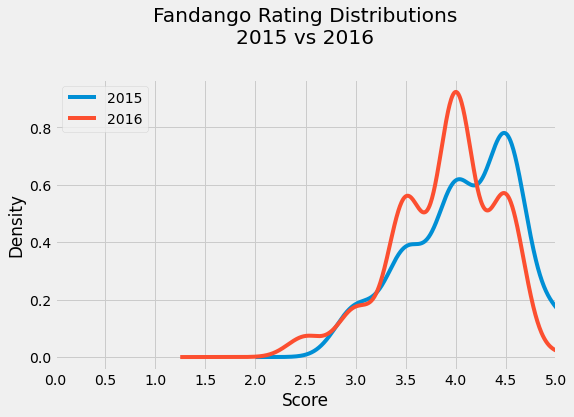

In [9]:
plt.style.use('fivethirtyeight')
fandango_15['Fandango_Stars'].plot.kde(label = '2015', legend=True, figsize = (8,5))
fandango_16['fandango'].plot.kde(label = '2016', legend=True)
plt.title('Fandango Rating Distributions\n2015 vs 2016', y = 1.1)
plt.xlabel('Score')
plt.xlim(0,5)
plt.xticks(arange(0,5.5,.5))
plt.show()

Comparing the two graphs, we can see that both are still heavily left skewed.  Comparing 2015 to 2016, we can see that there is a bit of a change.  We can see that most of the ratings have shifted down a bit from 4.5 to 4.0.  There are also a bit of 2.5 ratings added in, but very few.  Predominantly the ratings are higher and this is suspicious since Fandango is also a seller of tickets so higher ratings would help their bottom line.  

Since ratings in 2016 are a bit lower than 2015.  This can potentially show that they did fix the glitch, or it could also mean that movies in 2016 were slightly worse than 2015.  Either way, we can easily see that there is a shift in ratings when comparing popular movies from 2015 to 2016.

#### Analyzing the differences
Now that we visualized the distribution differences, we should take a look at the actual frequency distributions tables and compare them.  To get a better sense of the shift in overall rating value, it will be easier to use relative frequencies as a percentage.

In [10]:
print('2015')
print('-'*20)
fandango_15['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

2015
--------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [11]:
print('2016')
print('-'*20)
fandango_16['fandango'].value_counts(normalize = True).sort_index() * 100

2016
--------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

As we can, there definitely was a shift between the two years.  In 2015 there were zero 2.5 ratings, however in 2016 there are.  Also, in 2015 there were almost 7% 5 stars compared to 2016 .5%.  

The majority of ratings are still in the 3.5-4.5 ratings.  Which are still very high ratings.  It seems that the ratings can still be heavily skewed to benefit Fandango, but they may have implemented a fix to reduce the amount of rounding errors.

#### Diving deeper into summary statistics
Now that we saw the kernel density plot and frequency distributions, we can look a bit further and compare the mean, median, and mode for 2015 vs. 2016 to see if we find any other useful information

In [12]:
mean_15 = fandango_15['Fandango_Stars'].mean()
mean_16 = fandango_16['fandango'].mean()

median_15 = fandango_15['Fandango_Stars'].median()
median_16 = fandango_16['fandango'].median()

mode_15 = fandango_15['Fandango_Stars'].mode()[0]
mode_16 = fandango_16['fandango'].mode()[0]

summary_stats = pd.DataFrame()
summary_stats['2015'] = [mean_15,median_15,mode_15]
summary_stats['2016'] = [mean_16,median_16,mode_16]
summary_stats.index = ['mean','median','mode']
summary_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


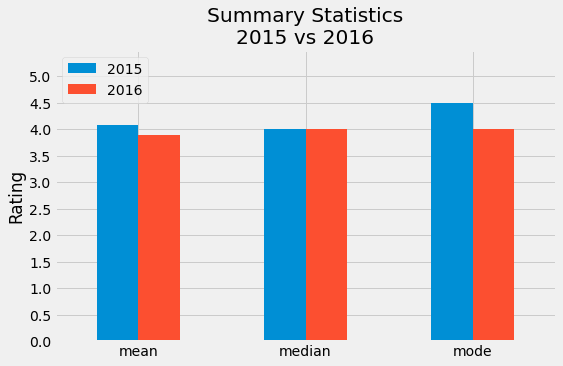

In [13]:
summary_stats.plot.bar(title = 'Summary Statistics\n2015 vs 2016', rot = 0, figsize = (8,5))
plt.ylabel('Rating')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.5,.5))
plt.show()

As we can see both the mean and mode are lower in 2016 when compared to 2015.  This confirms that the overall star rating in 2016 has gone down when compared to 2015.  

Based on the analysis so far, we can see that 2016 movies were indeed rated lower on Fandango when compared to the year prior.  The likely explanation is that Fandango fixed their 'glitch'.  

There could be other reasons for the drop though, such as movies were overall rated lower.  To investigate this further, we could compare other rating's site for 2015 vs 2016, but we'd have to gather more data for this.

Given our current dataset, we can at least quickly compare Fandango's rating in 2016 to other sites to see if Fandango is still heavily skewed regardless of the changes they may or may not have implemented.  We'll use the normalized ratings from each site, rounded to the nearest 0.5 to be fair.

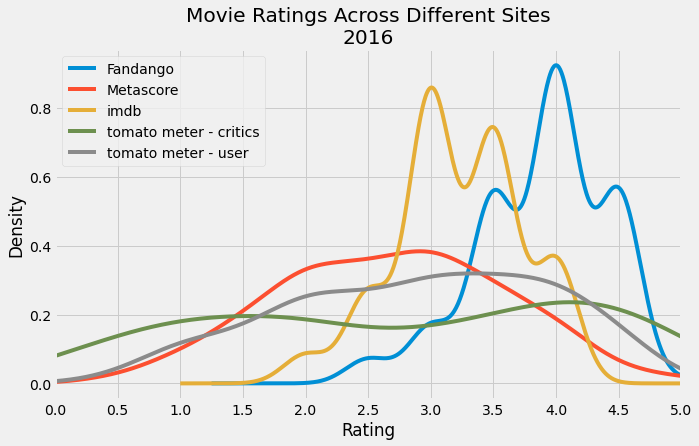

In [14]:
ratings_all = pd.read_csv('movie_ratings_16_17.csv')
ratings_all_16 = ratings_all[ratings_all['year'] == 2016]
ratings_all_16['fandango'].plot.kde(label = 'Fandango', legend = True, figsize = (10,6))
ratings_all_16['nr_metascore'].plot.kde(label = 'Metascore', legend = True)
ratings_all_16['nr_imdb'].plot.kde(label = 'imdb', legend = True)
ratings_all_16['nr_tmeter'].plot.kde(label = 'tomato meter - critics', legend = True)
ratings_all_16['nr_audience'].plot.kde(label = 'tomato meter - user', legend = True)
plt.title('Movie Ratings Across Different Sites\n2016')
plt.xlim(0,5)
plt.xlabel('Rating')
plt.xticks(arange(0,5.5,.5))
plt.show()

# Conclusion
As we can see from the final graph.  Fandango is heavily skewed for higher ratings when compared all other sites.  Although Fandango likely implemented a fix to their glitch, it is still very suspicious that their ratings are skewed higher.  

Since they sell tickets, it is in their best interest to have higher ratings and despite the fix they made, their ratings are not trustworthy.

Looking at Fandango's site now, they removed their own rating system and use only the Tomato Meter.  They may have continued to get bad publicity for manipulating ratings and their final fix was to remove their own rating altogether.

Ultimately, what we can see is when an analysis comes out that puts pressure on companies to change their image, it works.